In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms, datasets

In [14]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100.0%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




9.9%

100.0%


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100.0%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [15]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [16]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [17]:
# data is a tensor object containing a tensor of tensors (images), and a tensor of tensors (labels)
x, y = data[0][0], data[1][0] # images, 0th image; first image, 0th tensor

print(y)

tensor(4)


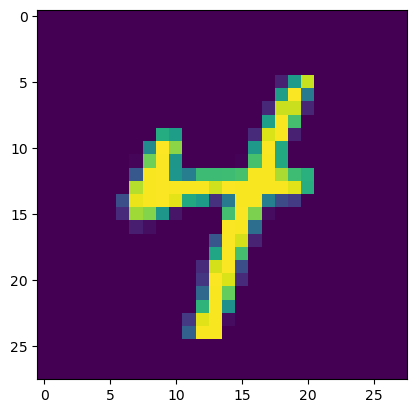

In [20]:
plt.imshow(data[0][0].view(28,28))

In [23]:
# how can we confirm our dataset is balanced?
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1 # add to counters as we iterate over dataset
        total +=1
        
print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [26]:
for i in counter_dict:
    print(f"{i}: {round(counter_dict[i]/total*100,2)} % of dataset")

0: 9.87 % of dataset
1: 11.24 % of dataset
2: 9.93 % of dataset
3: 10.22 % of dataset
4: 9.74 % of dataset
5: 9.04 % of dataset
6: 9.86 % of dataset
7: 10.44 % of dataset
8: 9.75 % of dataset
9: 9.92 % of dataset


In [27]:
# it's balanced enough :)